In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from math import sqrt
from joblib import dump, load

In [52]:
# Instancia o dataframe

df_airbnb = pd.read_csv('airbnb.csv', index_col='id', engine='python', sep =',', encoding="utf-8")
df_airbnb

,latitude,longitude,neighbourhood,room_type,property_type,bedrooms,accommodates,cleaning_fee,security_deposit,Free_parking_on_premises,...,Air_conditioning,Crib,Washer,Dishwasher,Suitable_for_events,Full_kitchen,Internet,Bathtub,Cable_TV,price
id,,,,,,,,,,,,,,,,,,,,,
17878,-22.96592,-43.17896,0,0,0,2.0,5,378.0,0.0,0,...,1,0,0,0,1,0,1,0,1,332.0
25026,-22.97712,-43.19045,0,0,1,1.0,2,250.0,1000.0,0,...,1,0,0,0,0,0,1,0,1,160.0
31560,-22.98302,-43.21427,1,0,1,1.0,3,84.0,0.0,0,...,1,0,0,0,0,0,1,0,1,273.0
35636,-22.98816,-43.19359,1,0,1,1.0,3,172.0,1050.0,0,...,1,0,1,0,0,0,1,0,1,378.0
35764,-22.98127,-43.19046,0,0,2,1.0,2,140.0,400.0,0,...,1,0,0,0,0,0,0,0,1,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38350109,-22.92987,-43.17777,14,1,1,2.0,6,150.0,0.0,0,...,1,0,1,0,0,0,0,0,0,252.0
38350512,-22.93877,-43.18292,7,1,1,1.0,2,50.0,0.0,0,...,1,0,0,0,0,0,0,0,0,101.0
38352236,-22.97566,-43.19070,0,0,1,3.0,8,150.0,2000.0,0,...,1,0,1,0,0,0,0,0,1,369.0


In [53]:
# Define semente aleatória

random_state=1223614

In [54]:
# Vamos dividir da seguinte forma: 90% para treino e 10% para teste. 
# Os registros deverão ser embaralhados.

X = df_airbnb.drop(columns=['price'])
y = df_airbnb['price']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, random_state=random_state)

print("Quantidade de registros de X_train: " + str(X_train.shape[0]))
print("Quantidade de registros de y_train: " + str(y_train.shape[0]))
print("Quantidade de registros de X_test: " + str(X_test.shape[0]))
print("Quantidade de registros de y_test: " + str(y_test.shape[0]))

Quantidade de registros de X_train: 6300
Quantidade de registros de y_train: 6300
Quantidade de registros de X_test: 700
Quantidade de registros de y_test: 700


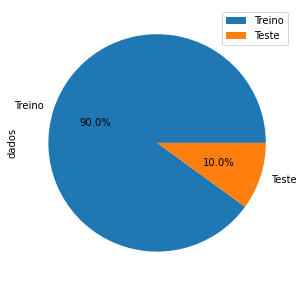

In [55]:
df = pd.DataFrame({'dados': [X_train.shape[0] , X_test.shape[0]]}, index=['Treino', 'Teste'])
df.plot.pie(y='dados', figsize=(5, 5), autopct='%1.1f%%')

In [56]:
# criando lista de modelos preditivos a serem comparados
# mapeando os nomes dos parâmetros dos modelos aos valores a serem verificados
# o modelo LinearRegression será usado como linha de base para os resultados, por ser o mais simples.
# ou seja: um "bom modelo" deve superar o LinearRegression.

models = []

from sklearn.linear_model import LinearRegression
param_grid_0 = {}
param_grid_1 = {'fit_intercept':[True,False],'normalize':[True,False]}
models.append(('LinearRegression', LinearRegression(), param_grid_0, param_grid_1))

from sklearn.linear_model import Ridge
param_grid_0 = {}
param_grid_1 = {'alpha':[0.01, 10, 1000],'normalize':[True,False],'copy_X':[True,False]
                , 'fit_intercept':[True,False], 'max_iter':[None], 'normalize':[True,False]
                , 'random_state':[None,0], 'solver':['auto'], 'tol':[0.001]}
models.append(('Ridge', Ridge(), param_grid_0, param_grid_1))

from sklearn.svm import SVR
param_grid_0 = {}
param_grid_1 = {'kernel':['linear', 'rbf'], 'gamma': [0.001, 0.1, 1, 10],'C': [0.001, 0.1, 1, 10]
                , 'epsilon': [x/100 for x in range(100,201,10)]}
models.append(('SVR', SVR(), param_grid_0, param_grid_1))

from sklearn.ensemble import RandomForestRegressor
param_grid_0 = {}
param_grid_1 = {'max_depth':range(1,4), 'random_state':[None, 0]
                , 'n_estimators':range(50,151,50),'bootstrap' :[True,False]}
models.append(('RandomForestRegressor', RandomForestRegressor(), param_grid_0, param_grid_1))

from sklearn.ensemble import GradientBoostingRegressor
param_grid_0 = {}
param_grid_1 = {'n_estimators':range(60,201,40), 'max_depth':range(1,5,2)
                , 'learning_rate':[x/100 for x in range(10,101,20)]}
models.append(('GradientBoostingRegressor', GradientBoostingRegressor(), param_grid_0, param_grid_1))

from sklearn.neighbors import KNeighborsRegressor
param_grid_0 = {}
param_grid_1 = {'n_neighbors':[3, 5, 7],'weights':['uniform','distance'],'p':[1,2]  }
models.append(('KNeighborsRegressor', KNeighborsRegressor(), param_grid_0, param_grid_1))

from sklearn.tree import DecisionTreeRegressor
param_grid_0 = {}
param_grid_1 = {'max_depth':[None, 1, 2, 3, 4, 5, 6],'splitter':['best','random']
                ,'presort':[True,False]}
models.append(('DecisionTreeRegressor', DecisionTreeRegressor(), param_grid_0, param_grid_1))

from sklearn.linear_model import Lasso
param_grid_0 = {}
param_grid_1 = {'fit_intercept':[True,False],'normalize':[True,False]
                ,'copy_X':[True,False],'selection':['cyclic','random'],'alpha':np.logspace(-3,3,5)}
models.append(('Lasso', Lasso(), param_grid_0, param_grid_1))

from sklearn.linear_model import ElasticNet
param_grid_0 = {}
param_grid_1 = {'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False]
                ,'selection':['cyclic','random'],'alpha':np.logspace(-3,3,5)}
models.append(('ElasticNet', ElasticNet(), param_grid_0, param_grid_1))

from sklearn.ensemble import AdaBoostRegressor
param_grid_0 = {}
param_grid_1 = {'n_estimators':[20,50,80,100],'loss':['linear', 'square', 'exponential']
                ,'random_state':[None,0,42]}
models.append(('AdaBoostRegressor', AdaBoostRegressor(), param_grid_0, param_grid_1))

from sklearn.linear_model import SGDRegressor
param_grid_0 = {}
param_grid_1 = {'loss':['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive']
                ,'penalty':['none','l2', 'l1','elasticnet'],'alpha':np.logspace(-3,3,5),'l1_ratio':[0.05,0.5,0.95]}
models.append(('SGDRegressor', SGDRegressor(), param_grid_0, param_grid_1))

from sklearn.linear_model import LassoLars
param_grid_0 = {}
param_grid_1 = {'alpha':[0.01, 0.5, 1.0, 1.5, 2.0], 'max_iter':[100, 300, 500]}
models.append(('LassoLars', LassoLars(), param_grid_0, param_grid_1))                           

models_df = pd.DataFrame(models, columns=['name', 'model', 'par_grid_0', 'par_grid_1'])
models_df.set_index('name', inplace = True)
models_df

,model,par_grid_0,par_grid_1
name,,,
LinearRegression,LinearRegression(),{},"{'fit_intercept': [True, False], 'normalize': ..."
Ridge,Ridge(),{},"{'alpha': [0.01, 10, 1000], 'normalize': [True..."
SVR,SVR(),{},"{'kernel': ['linear', 'rbf'], 'gamma': [0.001,..."
RandomForestRegressor,RandomForestRegressor(),{},"{'max_depth': (1, 2, 3), 'random_state': [None..."
GradientBoostingRegressor,GradientBoostingRegressor(),{},"{'n_estimators': (60, 100, 140, 180), 'max_dep..."
KNeighborsRegressor,KNeighborsRegressor(),{},"{'n_neighbors': [3, 5, 7], 'weights': ['unifor..."
DecisionTreeRegressor,DecisionTreeRegressor(),{},"{'max_depth': [None, 1, 2, 3, 4, 5, 6], 'split..."
Lasso,Lasso(),{},"{'fit_intercept': [True, False], 'normalize': ..."
ElasticNet,ElasticNet(),{},"{'fit_intercept': [True, False], 'normalize': ..."


In [57]:
# Definindo função score de regressão: Raiz do Erro Quadrático Médio - RMSE (Root Mean Square Error)
from sklearn.metrics import make_scorer
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [58]:
# Definindo função Grid Search
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

def grid_search(models_dataframe, data):
    names = []
    best_scores = []
    best_params = []
    best_estimator = []
    X_train = data[0]
    y_train = data[1]

    cross_validator = KFold(5)

    for index, row in models_dataframe.iterrows():
        name = index
        model = row[0]
        par_grid = row[1]
        grid = GridSearchCV(estimator = model, param_grid = par_grid, cv = cross_validator, scoring = rmse_scorer)
        grid.fit(X_train, np.ravel(y_train,order='C'))
        names.append(name)
        best_scores.append(round((-1)*grid.best_score_, 4))
        best_params.append(grid.best_params_)
        best_estimator.append(grid.best_estimator_)
        print('Model: ' + name + ' | ', 'Score: ' + str(round((-1)*grid.best_score_, 4)))
        
    result_table = pd.DataFrame({'Model': names, 'Score': best_scores, 'best_params':best_params, 'best_estimator':best_estimator})
    result_table.set_index('Model', inplace = True)
    result_table.sort_values(by = ['Score'], ascending = True, inplace = True)
    return result_table

In [59]:
# Executando o primeiro grid search com todos os algoritmos,
# com a menor lista de parâmetros.
result1 = grid_search(models_df.loc[:, ['model', 'par_grid_0']], [X_train, y_train])

Model: LinearRegression |  Score: 103.0622
Model: Ridge |  Score: 103.2027
Model: SVR |  Score: 132.1965
Model: RandomForestRegressor |  Score: 99.0608
Model: GradientBoostingRegressor |  Score: 97.1066
Model: KNeighborsRegressor |  Score: 118.9569
Model: DecisionTreeRegressor |  Score: 138.4172
Model: Lasso |  Score: 103.9954
Model: ElasticNet |  Score: 106.5456
Model: AdaBoostRegressor |  Score: 117.7997
Model: SGDRegressor |  Score: 3.861263268591737e+16
Model: LassoLars |  Score: 131.4781


In [60]:
result1

,Score,best_params,best_estimator
Model,,,
GradientBoostingRegressor,9.710660e+01,{},([DecisionTreeRegressor(criterion='friedman_ms...
RandomForestRegressor,9.906080e+01,{},"(DecisionTreeRegressor(max_features='auto', ra..."
LinearRegression,1.030622e+02,{},LinearRegression()
Ridge,1.032027e+02,{},Ridge()
Lasso,1.039954e+02,{},Lasso()
ElasticNet,1.065456e+02,{},ElasticNet()
AdaBoostRegressor,1.177997e+02,{},"(DecisionTreeRegressor(max_depth=3, random_sta..."
KNeighborsRegressor,1.189569e+02,{},KNeighborsRegressor()
LassoLars,1.314781e+02,{},LassoLars()


In [61]:
# Executando o segundo grid search com a metade superior dos algoritmos do grid anterior,
# com a segunda lista de parâmetros.
result2 = grid_search(models_df.loc[result1.head(result1.shape[0]//2).index.tolist(), ['model', 'par_grid_1']], [X_train, y_train])

Model: GradientBoostingRegressor |  Score: 96.814
Model: RandomForestRegressor |  Score: 107.0254
Model: LinearRegression |  Score: 103.0622
Model: Ridge |  Score: 103.0578
Model: Lasso |  Score: 103.0566
Model: ElasticNet |  Score: 103.3469


In [62]:
result2

,Score,best_params,best_estimator
Model,,,
GradientBoostingRegressor,96.8140,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",([DecisionTreeRegressor(criterion='friedman_ms...
Lasso,103.0566,"{'alpha': 0.001, 'copy_X': True, 'fit_intercep...","Lasso(alpha=0.001, normalize=True)"
Ridge,103.0578,"{'alpha': 0.01, 'copy_X': True, 'fit_intercept...","Ridge(alpha=0.01, normalize=True)"
LinearRegression,103.0622,"{'fit_intercept': True, 'normalize': True}",LinearRegression(normalize=True)
ElasticNet,103.3469,"{'alpha': 0.001, 'copy_X': False, 'fit_interce...","ElasticNet(alpha=0.001, copy_X=False, selectio..."
RandomForestRegressor,107.0254,"{'bootstrap': True, 'max_depth': 3, 'n_estimat...","(DecisionTreeRegressor(max_depth=3, max_featur..."


In [63]:
# Obtivemos 3 algoritmos melhores que o LinearRegression, que foi considerado o nosso algoritmo de base.
# Ou seja: A etapa de otimização do modelo foi bem-sucedida.

print("Melhor algoritmo encontrado pelo grid: ")
print(str(result2['best_estimator'][0]))
print(str(result2['Score'][0]))

Melhor algoritmo encontrado pelo grid: 
GradientBoostingRegressor(n_estimators=180)
96.814


In [64]:
regr = result2['best_estimator'][0]

In [65]:
# Treina o modelo com a massa de treino.
regr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=180)

In [66]:
# Salva o modelo treinado
dump(regr, 'regressor.joblib')

['regressor.joblib']